<a href="https://colab.research.google.com/github/logansmith9454/cse450/blob/main/notebooks/starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from google.colab import files

In [120]:
campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')
campaign.dropna()

ro = RandomOverSampler()


campaign['y'] = campaign['y'].map({'no': 0, 'yes': 1})
campaign['not_contacted'] = (campaign['pdays'] == 999).astype(int)
median_pdays = campaign[campaign['pdays'] != 999]['pdays'].median()
campaign['pdays'] = campaign['pdays'].replace(999, median_pdays)

X = campaign

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, drop_first=True)
y = campaign['y']

features_to_drop = ['y',
"month_sep",
"month_nov",
"month_mar",
"month_jun",
"month_aug",
"month_may",
"month_jul",
"cons.conf.idx",
"nr.employed",
"emp.var.rate",
"pdays",
"housing_unknown",
"poutcome_success",
"loan_unknown",
"marital_unknown",
"month_dec",
"default_yes",
"education_illiterate",
                    "job_unknown"]

for feature in features_to_drop:
  if feature in X.columns:
    X = X.drop(columns=[feature])


X_new, y_new = ro.fit_resample(X, y)

new_campaign = pd.DataFrame(y_new)

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1, stratify=y_new, random_state=42)

clf = RandomForestClassifier(random_state=42, n_estimators=500, max_depth=12)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))


# Predict
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Probs for AUC

# Metrics (focus on F1/ROC-AUC for imbalance)
print(classification_report(y_test, y_pred))
print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.3f}')

0.7825954663015365
              precision    recall  f1-score   support

           0       0.74      0.86      0.80      3287
           1       0.84      0.70      0.76      3286

    accuracy                           0.78      6573
   macro avg       0.79      0.78      0.78      6573
weighted avg       0.79      0.78      0.78      6573

ROC-AUC: 0.881


In [121]:
# from sklearn.model_selection import RandomizedSearchCV

# # Define the parameter distribution for RandomizedSearchCV
# param_dist = {
#     'max_depth': [None] + list(np.arange(16, 19, 1)), # None or values from 5 to 20 with step 5
#     'n_estimators': np.arange(375, 426, 25) # Values from 100 to 600 with step 100
# }

# # Initialize RandomizedSearchCV
# # n_iter is the number of parameter settings that are sampled
# # cv is the number of cross-validation folds
# random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
#                                    param_distributions=param_dist,
#                                    n_iter=2, # You can increase this for a more extensive search
#                                    cv=5,
#                                    scoring='recall', # Use recall as a scoring metric
#                                    random_state=42,
#                                    n_jobs=-1) # Use all available cores

# # Fit RandomizedSearchCV to the training data
# random_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best parameters found by RandomizedSearchCV (scoring on recall):")
# print(random_search.best_params_)
# print(f"Best Recall score on cross-validation: {random_search.best_score_:.3f}")

# # Get the best model
# best_rf_clf_recall = random_search.best_estimator_

# # Evaluate the best model on the test set
# print("\nBest Random Forest Model Performance on Test Set (trained with recall scoring):")
# y_pred_best_rf_recall = best_rf_clf_recall.predict(X_test)
# y_pred_proba_best_rf_recall = best_rf_clf_recall.predict_proba(X_test)[:, 1]

# print(classification_report(y_test, y_pred_best_rf_recall))
# print(f'ROC-AUC: {roc_auc_score(y_test, y_pred_proba_best_rf_recall):.3f}')

In [122]:
# baseline = accuracy_score(y_test, clf.predict(X_test))
# print(f"Baseline Accuracy: {baseline:.3f}")

# result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
# importances = result.importances_mean

# sorted_idx = importances.argsort()[::-1]
# print("\nIndividual Feature Importances (Drop in Accuracy):")
# for i in sorted_idx:
#     print(f"{X.columns[i]}: {importances[i]:.3f} (drop from {baseline:.3f})")

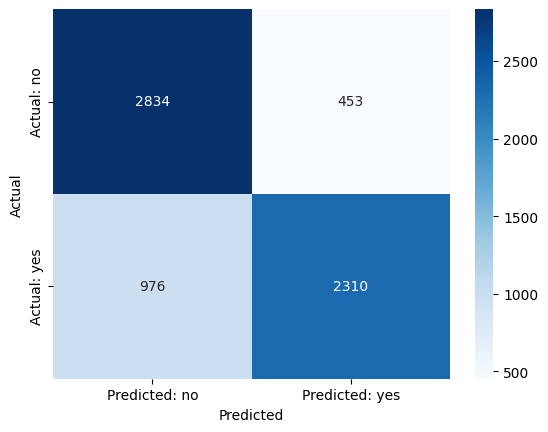

In [123]:
cm = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted: no', 'Predicted: yes'], yticklabels=['Actual: no', 'Actual: yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [124]:
holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test_mini.csv")
holdout.dropna()
holdout['not_contacted'] = (holdout['pdays'] == 999).astype(int)
median_pdays = holdout[holdout['pdays'] != 999]['pdays'].median()
holdout['pdays'] = holdout['pdays'].replace(999, median_pdays)

features_to_drop = ['y',
"month_sep",
"month_nov",
"month_mar",
"month_jun",
"month_aug",
"month_may",
"month_jul",
"cons.conf.idx",
"nr.employed",
"emp.var.rate",
"pdays",
"housing_unknown",
"poutcome_success",
"loan_unknown",
"marital_unknown",
"month_dec",
"default_yes",
"education_illiterate",
                    "job_unknown"]

for feature in features_to_drop:
  if feature in holdout.columns:
    holdout = holdout.drop(columns=[feature])

# Apply one-hot encoding to the holdout data
X_holdout = pd.get_dummies(holdout, drop_first=True)

# Get the list of columns from the training data
trained_columns = X_new.columns

# Reindex the holdout data to match the training data columns and fill missing values with 0
X_holdout = X_holdout.reindex(columns=trained_columns, fill_value=0)

predictions = clf.predict(X_holdout)
predictions = np.array(predictions).astype(int)
print(predictions)
print(f"predictions: {len(predictions)}")
print(f"holdout: {len(holdout)}")
output_df = pd.DataFrame(predictions, columns=['predictions'])

output_df.to_csv('team2-module2-predictions.csv', index=False)
files.download('team2-module2-predictions.csv')

[0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0
 0 0 0]
predictions: 410
holdout: 410


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>